## ``INFO4127`` : OPTIMISATION II

# TP1 : Utilisation des outils de calcul symbolique sur les fonctions de perte

### Membres du groupe :
- MVOGO MONDOMAN Franck Stéphane : ``20Y058``
- ETOUNDI TSANGA Elihu Frédéric : ``22Y567``
- ABANDA Armand Wilfried : ``21T2487``

### Introduction

**Une fonction de perte** est un processus mathématique qui quantifie la marge d'erreur entre la prédiction d'un modèle et la valeur cible réelle. Elle est un moyen mesurable d'évaluer les performances et la précision d'un modèle d'apprentissage automatique.

Dans la suite de ce notebook, pour chacune des fonctions de pertes suivantes :
- Erreur Quadratique Moyenne
- Entropie Croisée Binaire
- Entropie Croisée Catégorielle
- Perte de Huber

Nous allons à l'aide des fonctions de calcul symbolique du langage python :
1. Fournir les expressions des gradients de ces fonctions.
2. Étudier les propriétés de convexité des fonctions
3. Représenter les courbes de ses fonctions et Trouver l'équation de la tangente à l'ellipse au point de coordonnées données sur un jeu de données dédiées.
 

### Outils utilisés
- Python 3.13.5
- Sympy 1.14.0
- Matplotlib

In [63]:
# Importations des bibliothèques nécessaires
import sympy as sp
import matplotlib.pyplot as plt

### Présentations des jeux de données pour l'étude graphique

##### 1. Jeu de données pour la classification  
- **Nom** : Apples and Oranges  
- **Lien** : [Kaggle – Apples and Oranges](https://www.kaggle.com/code/raykleptzo/classification-data-apples-and-oranges/input)  
- **Colonnes** :  
  - `weight` : poids du fruit  
  - `size` : taille du fruit  
  - `class` : étiquette de classification (pomme ou orange)  
- **Taille** : 40 observations  

---

##### 2. Jeu de données pour la régression  
- **Nom** : Multiple Linear Regression Dataset  
- **Lien** : [Kaggle – Multiple Linear Regression Dataset](https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset?resource=download)  
- **Colonnes** :  
  - `age` : âge de la personne  
  - `experience` : nombre d’années d’expérience  
  - `income` : revenu (variable cible pour la régression)  
- **Taille** : 20 observations  


# 1. Gradients des fonctions de perte

# Fonctions de Perte : Descriptions Brèves

- **Erreur Quadratique Moyenne (MSE)** : Mesure l'écart quadratique moyen entre les prédictions et les valeurs réelles. Formule : \( L_{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 \).

- **Entropie Croisée Binaire (BCE)** : Évalue la divergence entre probabilités prédites et étiquettes binaires (0 ou 1). Idéale pour la classification binaire, elle pénalise fortement les prédictions incorrectes. Formule : \( L_{BCE} = - [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})] \).

- **Entropie Croisée Catégorielle (CCE)** : Généralisation de BCE pour la classification multi-classe. Mesure la divergence entre distributions prédites et réelles pour \( K \) classes. Formule : \( L_{CCE} = - \sum_{k=1}^K y_k \log(\hat{y}_k) \).

- **Perte de Huber** : Combine MSE pour les petites erreurs (comportement quadratique) et une perte linéaire pour les grandes erreurs, réduisant la sensibilité aux valeurs aberrantes. Formule (pour \( \delta \)) : 
  \[
  L_{Huber} = 
  \begin{cases} 
  \frac{1}{2} (\hat{y} - y)^2 & \text{si } |\hat{y} - y| \leq \delta \\
  \delta |\hat{y} - y| - \frac{1}{2} \delta^2 & \text{sinon}
  \end{cases}
  \]

### a. Erreur Quadratique Moyenne (MSE)

LA MSE est une est une fonction de perte qui quantifie l'ampleur de l'erreur entre la prédiction d'un algorithme d'apprentissage automatique et une sortie réelle en prenant la moyenne de la différence quadratique entre les prédictions et les valeurs cibles.
Son expression est la suivante :
**MSE = (1/n) * Σ(ȳᵢ - yᵢ)²**

Où ?

- n est le nombre d'échantillons dans l'ensemble de données
- ȳᵢ est la valeur prédite pour le i-ième échantillon
- yᵢ est la valeur cible pour le i-ième échantillon

In [64]:
# Affichage mathématique élégant
sp.init_printing()

y__hat, y = sp.symbols('y__hat y') # définition des symboles

# Expression
L_mse = (y__hat - y)**2
print(f'Expression de la fonction : {L_mse}')

# Gradient vectoriel
MSE_grad = sp.diff(L_mse, y__hat)
print('Expression du gradient : ')  # Résultat : 2*(y__hat - yi)
MSE_grad


Expression de la fonction : (-y + y__hat)**2
Expression du gradient : 


### b. Entropie Croisée Binaire

Expression de la fonction : -y*log(y__hat) - (1 - y)*log(1 - y__hat)
Expression du gradient : 


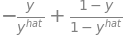

In [65]:
# Expression
L_bce = -y * sp.log(y__hat) - (1 - y) * sp.log(1 - y__hat)
print(f'Expression de la fonction : {L_bce}')

# Gradient vectoriel
BCE_grad = sp.diff(L_bce, y__hat)
print('Expression du gradient : ')  # Résultat : (1 - y)/(1 - y__hat) - y/y__hat
BCE_grad

### c. Entropie Croisée Catégorielle

Expression de la fonction : -y_k*log(y__hat_k)
Expression du gradient : 


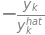

In [66]:
y_k, y__hat_k = sp.symbols('y_k y__hat_k')

# Expression
L_cce = -y_k * sp.log(y__hat_k)
print(f'Expression de la fonction : {L_cce}')

# Gradient vectoriel
CCE_grad = sp.diff(L_cce, y__hat_k)
print('Expression du gradient : ')  # Résultat : -y_k/y__hat_k
CCE_grad

### d. Perte de Huber

Expression de la fonction si |r| <= delta : 0.5*(-y + y__hat)**2
Expression de la fonction si Cas |r| > delta : -0.5*delta**2 + delta*Abs(y - y__hat)
Expression du gradient si |r| <= delta : 
Expression du gradient si Cas |r| > delta : 


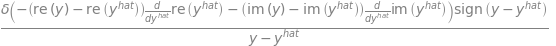

In [67]:
r = y__hat - y
delta = sp.Symbol('delta', positive=True)

# Expression
L_huber1 = 0.5 * r**2  # Cas |r| <= delta
print(f'Expression de la fonction si |r| <= delta : {L_huber1}')
L_huber2 = delta * sp.Abs(r) - 0.5 * delta**2  # Cas |r| > delta
print(f'Expression de la fonction si Cas |r| > delta : {L_huber2}')

# Gradient vectoriel
HUBER1_grad = sp.diff(L_huber1, y__hat)
HUBER2_grad = sp.diff(L_huber2, y__hat)
print('Expression du gradient si |r| <= delta : ')   # Résultat : y__hat - y
HUBER1_grad
print('Expression du gradient si Cas |r| > delta : ')   # Résultat : delta * sign(y__hat - y)
HUBER2_grad

# 2. Etude de la convexité

Pour étudier la convexité, une fonction ( f ) est convexe si sa matrice hessienne est semi-définie positive (ou si la dérivée seconde est positive pour une fonction univariée).

In [68]:
# Définir les symboles
y__hat, y = sp.symbols('y__hat y')  # Prédiction et valeur réelle
delta = sp.Symbol('delta', positive=True)  # Paramètre de Huber
k = sp.Symbol('k')  # Indice pour CCE

# Fonctions de perte
# MSE : (y__hat - y)^2
L_mse = (y__hat - y)**2

# BCE : -[y*log(y__hat) + (1-y)*log(1-y__hat)]
L_bce = -(y * sp.log(y__hat) + (1 - y) * sp.log(1 - y__hat))

# CCE : -y_k*log(y__hat_k) (simplifié pour une classe)
L_cce = -y * sp.log(y__hat)  # Pour une classe binaire, similaire à BCE

# Huber : piecewise
residual = sp.Abs(y__hat - y)
L_huber = sp.Piecewise((0.5 * (y__hat - y)**2, residual <= delta),
                       (delta * residual - 0.5 * delta**2, residual > delta))

# Vérification de la convexité via la dérivée seconde
print("Vérification de la convexité :")

# MSE
d2_mse = sp.diff(L_mse, y__hat, 2)  # Seconde dérivée
print("MSE - Dérivée seconde :", d2_mse, "-> Positive (2 > 0), donc convexe")

# BCE
d2_bce = sp.diff(L_bce, y__hat, 2)
print("BCE - Dérivée seconde :", d2_bce, "-> Positive pour y__hat in (0,1), donc convexe")

# CCE (simplifié pour une classe)
d2_cce = sp.diff(L_cce, y__hat, 2)
print("CCE - Dérivée seconde :", d2_cce, "-> Positive pour y__hat > 0, donc convexe")

# Huber (par morceaux)
d2_huber = sp.Piecewise((sp.diff(0.5 * (y__hat - y)**2, y__hat, 2), residual <= delta),
                        (0, residual > delta))  # Dérivée nulle en dehors
print("Huber - Dérivée seconde :", d2_huber, "-> Non-négative (1 ou 0), donc convexe non stricte")

# Conclusion
print("\nConclusion")
print("- MSE : Strictement convexe (dérivée seconde = 2 > 0).")
print("- BCE : Convexe pour y__hat ∈ (0,1) (dérivée seconde positive).")
print("- CCE : Convexe pour y__hat > 0 (similaire à BCE pour une classe).")
print("- Huber : Convexe non stricte (dérivée seconde non-négative, continue à delta).")

Vérification de la convexité :
MSE - Dérivée seconde : 2 -> Positive (2 > 0), donc convexe
BCE - Dérivée seconde : y/y__hat**2 - (y - 1)/(y__hat - 1)**2 -> Positive pour y__hat in (0,1), donc convexe
CCE - Dérivée seconde : y/y__hat**2 -> Positive pour y__hat > 0, donc convexe
Huber - Dérivée seconde : Piecewise((1.0, delta >= Abs(y - y__hat)), (0, True)) -> Non-négative (1 ou 0), donc convexe non stricte

Conclusion
- MSE : Strictement convexe (dérivée seconde = 2 > 0).
- BCE : Convexe pour y__hat ∈ (0,1) (dérivée seconde positive).
- CCE : Convexe pour y__hat > 0 (similaire à BCE pour une classe).
- Huber : Convexe non stricte (dérivée seconde non-négative, continue à delta).


# 3. Cas Pratique

### Charger les librairies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### charger les datasets

In [70]:
df_reg = pd.read_csv('Datasets/multiple_linear_regression_dataset.csv')
df_reg.columns = df_reg.columns.str.strip()
X_reg = df_reg[['age', 'experience']].values
y_reg = df_reg['income'].values

df_class = pd.read_csv('Datasets/apples_and_oranges.csv')
df_class.columns = df_class.columns.str.strip()
X_class = df_class[['Weight', 'Size']].values
y_class = df_class['Class'].map({'orange': 0, 'apple': 1}).values

### Fonctions de perte

In [71]:

# Fonctions de perte
def mse_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def bce_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Éviter log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def cce_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred))

def huber_loss(y_true, y_pred, delta=1.0):
    residuals = np.abs(y_pred - y_true)
    return np.mean(np.where(residuals <= delta, 0.5 * residuals**2, delta * residuals - 0.5 * delta**2))


### 1. Courbes pour le dataset de régression

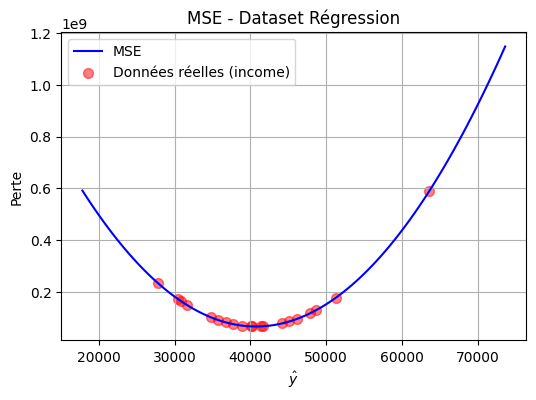

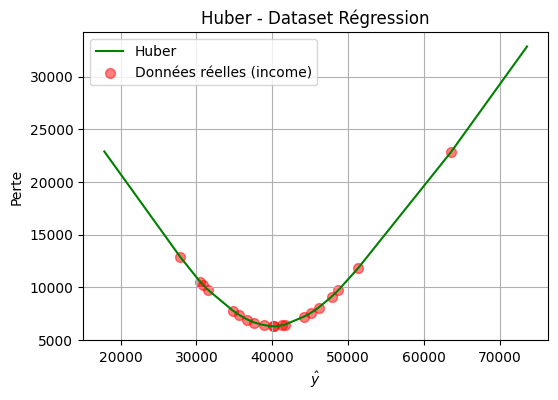

In [72]:
y_true_reg = y_reg  # Toutes les observations
y_pred_range_reg = np.linspace(np.min(y_reg) - 10000, np.max(y_reg) + 10000, 100)  # Plage adaptée
mse_values = [mse_loss(y_true_reg, np.full_like(y_true_reg, y)) for y in y_pred_range_reg]
huber_values = [huber_loss(y_true_reg, np.full_like(y_true_reg, y)) for y in y_pred_range_reg]

# MSE
plt.figure(figsize=(6, 4))
plt.plot(y_pred_range_reg, mse_values, label='MSE', color='blue')
plt.scatter(y_reg, [mse_loss(y_reg, y) for y in y_reg], color='red', s=50, label='Données réelles (income)', alpha=0.5)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('Perte')
plt.title('MSE - Dataset Régression')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/mse_reg.png', dpi=300, bbox_inches='tight')
plt.close()

# Huber
plt.figure(figsize=(6, 4))
plt.plot(y_pred_range_reg, huber_values, label='Huber', color='green')
plt.scatter(y_reg, [huber_loss(y_reg, y) for y in y_reg], color='red', s=50, label='Données réelles (income)', alpha=0.5)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('Perte')
plt.title('Huber - Dataset Régression')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/huber_reg.png', dpi=300, bbox_inches='tight')
plt.close()

### 2. Courbes pour le dataset de classification

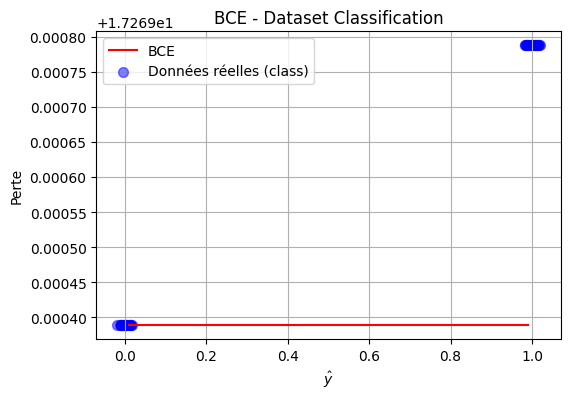

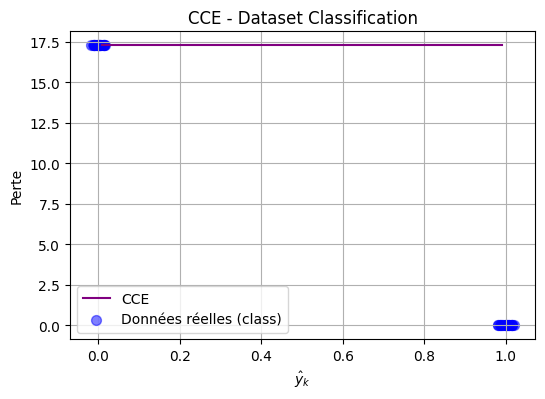

In [73]:
y_true_class = y_class  # Toutes les observations
y_pred_range_class = np.linspace(0.01, 0.99, 100)  # Probabilités pour BCE/CCE
bce_values = [bce_loss(y_true_class, np.full_like(y_true_class, y)) for y in y_pred_range_class]
cce_values = [cce_loss(y_true_class, np.full_like(y_true_class, y)) for y in y_pred_range_class]

# BCE avec points
plt.figure(figsize=(6, 4))
plt.plot(y_pred_range_class, bce_values, label='BCE', color='red')
# Ajouter un léger bruit pour la visibilité des points binaires
jitter = np.random.uniform(-0.02, 0.02, size=len(y_class))
plt.scatter(y_class + jitter, [bce_loss(y_class, y) for y in y_class], color='blue', s=50, label='Données réelles (class)', alpha=0.5)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('Perte')
plt.title('BCE - Dataset Classification')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/bce_class.png', dpi=300, bbox_inches='tight')
plt.close()

# CCE avec points
plt.figure(figsize=(6, 4))
plt.plot(y_pred_range_class, cce_values, label='CCE', color='purple')
plt.scatter(y_class + jitter, [cce_loss(y_class, y) for y in y_class], color='blue', s=50, label='Données réelles (class)', alpha=0.5)
plt.xlabel(r'$\hat{y}_k$')
plt.ylabel('Perte')
plt.title('CCE - Dataset Classification')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/cce_class.png', dpi=300, bbox_inches='tight')
plt.close()

### 3. Courbes combinées - Régression

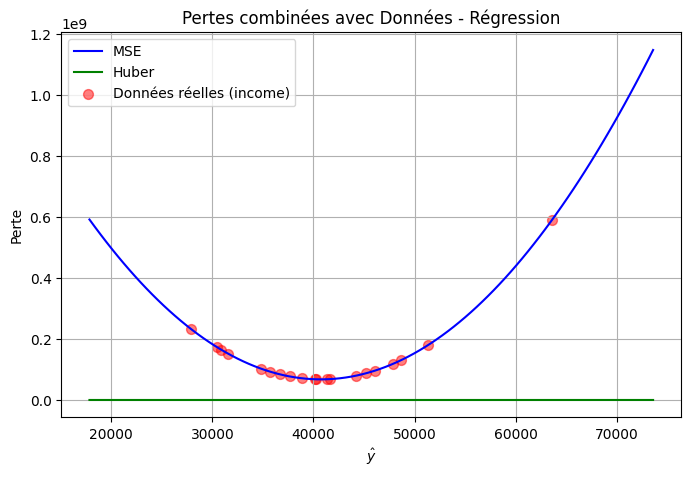

In [74]:
# Combinées - Régression
plt.figure(figsize=(8, 5))
plt.plot(y_pred_range_reg, mse_values, label='MSE', color='blue')
plt.plot(y_pred_range_reg, huber_values, label='Huber', color='green')
plt.scatter(y_reg, [mse_loss(y_reg, y) for y in y_reg], color='red', s=50, label='Données réelles (income)', alpha=0.5)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('Perte')
plt.title('Pertes combinées avec Données - Régression')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/combined_reg_with_data.png', dpi=300, bbox_inches='tight')
plt.close()

### 4. Courbes combinées - Classification

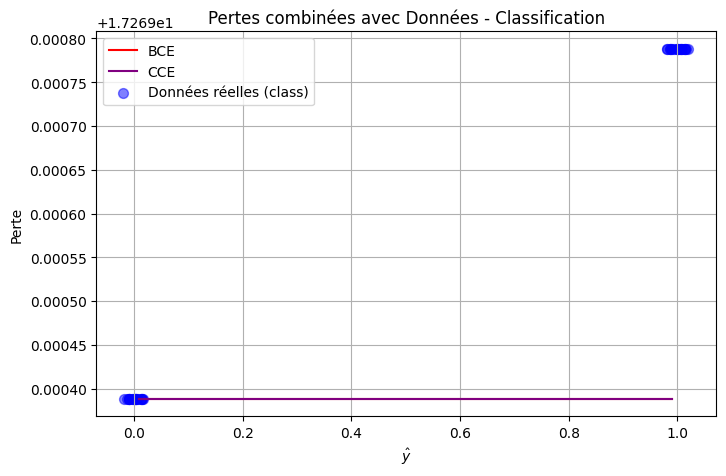

In [75]:
# Combinées - Classification
plt.figure(figsize=(8, 5))
plt.plot(y_pred_range_class, bce_values, label='BCE', color='red')
plt.plot(y_pred_range_class, cce_values, label='CCE', color='purple')
plt.scatter(y_class + jitter, [bce_loss(y_class, y) for y in y_class], color='blue', s=50, label='Données réelles (class)', alpha=0.5)
plt.xlabel(r'$\hat{y}$')
plt.ylabel('Perte')
plt.title('Pertes combinées avec Données - Classification')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Images/combined_class_with_data.png', dpi=300, bbox_inches='tight')
plt.close()